## Part 1 - Classification

In [17]:
import numpy as np 
import pandas as pd 

In [18]:
train = pd.read_csv('d:/data/titanic/train.csv')
test  = pd.read_csv('d:/data/titanic/test.csv')
sub   = pd.read_csv('d:/data/titanic/gender_submission.csv')

In [19]:
from pycaret.classification import *

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
# Preprocessing - Setup the dataset

clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'])

,Description,Value
0,Session id,6753
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 11)"
5,Transformed train set shape,"(623, 11)"
6,Transformed test set shape,"(268, 11)"
7,Ignore features,3
8,Ordinal features,1
9,Numeric features,6


In [24]:
# Compare the model(s)

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8057,0.8514,0.6781,0.8023,0.7254,0.5780,0.5896,0.3590
catboost,CatBoost Classifier,0.8056,0.8506,0.6571,0.8173,0.7208,0.5751,0.5887,0.9320
gbc,Gradient Boosting Classifier,0.8025,0.8485,0.6656,0.8005,0.7191,0.5697,0.5815,0.3410
lightgbm,Light Gradient Boosting Machine,0.7945,0.8351,0.6864,0.7700,0.7181,0.5583,0.5673,0.4140
et,Extra Trees Classifier,0.7848,0.8313,0.6737,0.7552,0.7073,0.5384,0.5448,0.3460
lda,Linear Discriminant Analysis,0.7847,0.8515,0.7111,0.7306,0.7181,0.5444,0.5471,0.2750
nb,Naive Bayes,0.7831,0.8179,0.6650,0.7530,0.7000,0.5323,0.5402,0.2640
lr,Logistic Regression,0.7814,0.8524,0.7069,0.7253,0.7142,0.5375,0.5393,0.7600
xgboost,Extreme Gradient Boosting,0.7800,0.8241,0.6781,0.7494,0.7014,0.5292,0.5391,0.2970
ada,Ada Boost Classifier,0.7767,0.8334,0.7114,0.7135,0.7098,0.5287,0.5314,0.2940


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=6753, verbose=0, warm_start=False)

In [27]:
# Create a RandomForest model

rf  = create_model('rf')  

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8462,0.6250,0.7500,0.6818,0.5132,0.5183
1,0.7619,0.8200,0.4167,0.9091,0.5714,0.4365,0.5002
2,0.9206,0.9322,0.8750,0.9130,0.8936,0.8304,0.8308
3,0.8065,0.8350,0.7391,0.7391,0.7391,0.5853,0.5853
4,0.7742,0.7971,0.6667,0.7273,0.6957,0.5167,0.5179
5,0.7419,0.8624,0.6250,0.6818,0.6522,0.4477,0.4487
6,0.7097,0.7862,0.7083,0.6071,0.6538,0.4064,0.4100
7,0.8710,0.8679,0.7917,0.8636,0.8261,0.7238,0.7256
8,0.8548,0.8920,0.7083,0.8947,0.7907,0.6819,0.6928


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
# Tune it

tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8803,0.6667,0.8421,0.7442,0.6144,0.6240
1,0.7937,0.8729,0.5000,0.9231,0.6486,0.5202,0.5692
2,0.9206,0.9103,0.8333,0.9524,0.8889,0.8276,0.8321
3,0.8387,0.8172,0.7391,0.8095,0.7727,0.6481,0.6497
4,0.8065,0.8191,0.6667,0.8000,0.7273,0.5792,0.5850
5,0.7258,0.8684,0.5000,0.7059,0.5854,0.3893,0.4023
6,0.7581,0.8081,0.7500,0.6667,0.7059,0.5016,0.5041
7,0.8548,0.8531,0.7083,0.8947,0.7907,0.6819,0.6928
8,0.8065,0.8991,0.5833,0.8750,0.7000,0.5654,0.5908


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


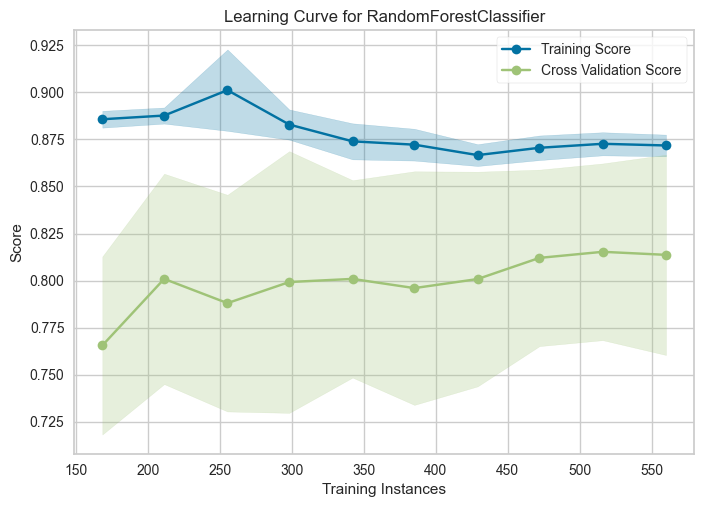

In [29]:
# Learning curve

plot_model(estimator = tuned_rf, plot = 'learning')

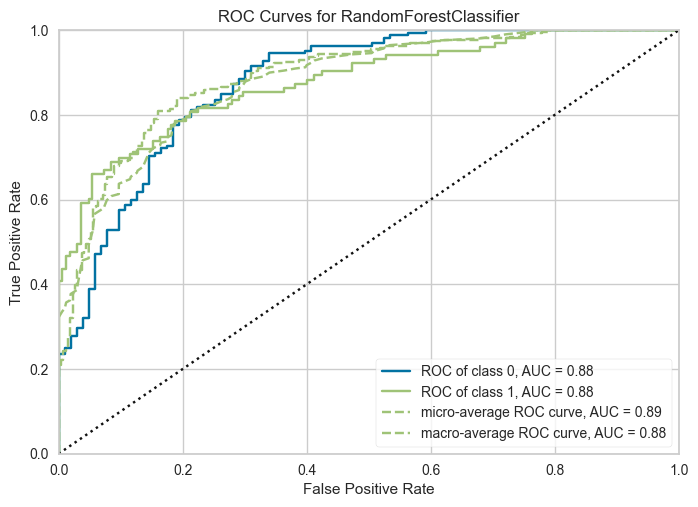

In [30]:
# AUC curve

plot_model(estimator = tuned_rf, plot = 'auc')

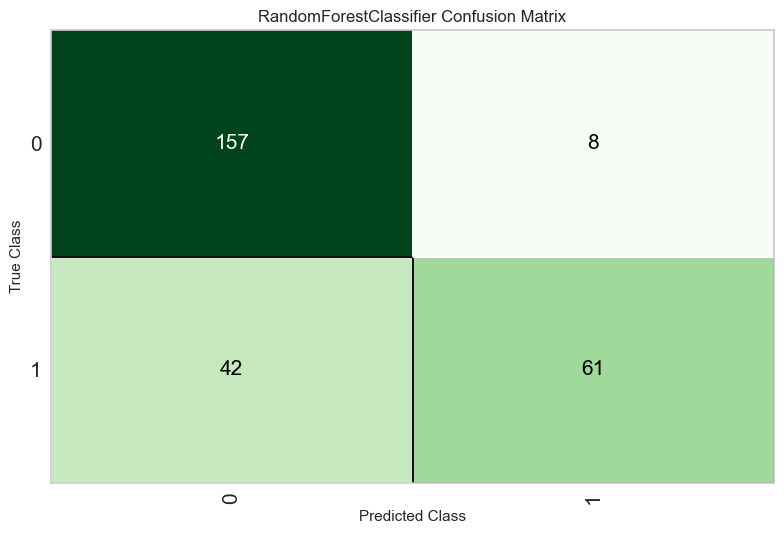

In [31]:
# Confusion matrix

plot_model(estimator = tuned_rf, plot = 'confusion_matrix')

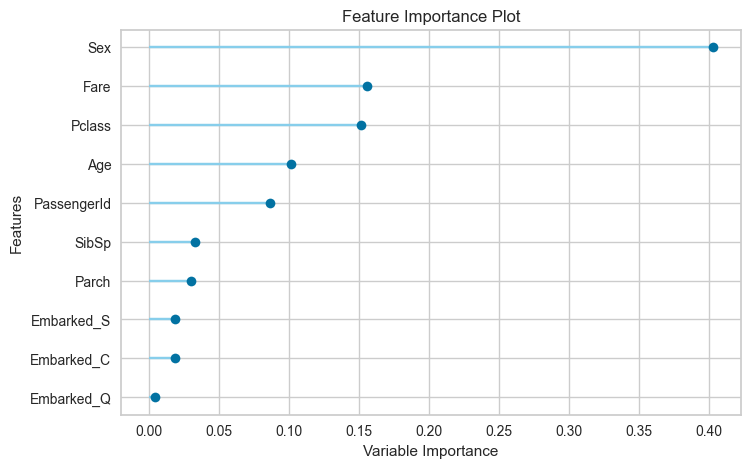

In [32]:
# Feature importance

plot_model(estimator = tuned_rf, plot = 'feature')

In [33]:
# Whole thing

evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [35]:
# Predictions

predict_model(tuned_rf, data=test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.829200,NaN,Q,0,0.8989
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.000000,NaN,S,0,0.5855
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.687500,NaN,Q,0,0.8799
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.662500,NaN,S,0,0.8622
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.287500,NaN,S,0,0.6018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,0,0.8947
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900002,C105,C,1,0.9091
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,0,0.9356
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,0,0.8947


In [37]:
predictions = predict_model(tuned_rf, data=test)
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.8989
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.5855
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.8799
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8622
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.6018


In [41]:
sub['Survived'] = round(predictions['prediction_score']).astype(int)
sub.to_csv('gender_submission.csv',index=False)
sub.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


In [42]:
# Blending

logr  = create_model('lr');          

blend = blend_models(estimator_list=[tuned_rf,logr])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8814,0.7500,0.7826,0.7660,0.6268,0.6272
1,0.8889,0.8964,0.8333,0.8696,0.8511,0.7625,0.7630
2,0.8254,0.9028,0.7500,0.7826,0.7660,0.6268,0.6272
3,0.7258,0.7882,0.6522,0.6250,0.6383,0.4177,0.4179
4,0.7258,0.8618,0.7083,0.6296,0.6667,0.4352,0.4373
5,0.7581,0.8662,0.6250,0.7143,0.6667,0.4781,0.4807
6,0.6935,0.7950,0.7083,0.5862,0.6415,0.3780,0.3832
7,0.7903,0.8553,0.7083,0.7391,0.7234,0.5547,0.5550
8,0.7903,0.8509,0.6667,0.7619,0.7111,0.5477,0.5507


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.8953,0.7500,0.8182,0.7826,0.6580,0.6595
1,0.8571,0.8921,0.6667,0.9412,0.7805,0.6791,0.7013
2,0.8889,0.9092,0.7500,0.9474,0.8372,0.7546,0.7665
3,0.7581,0.7971,0.6087,0.7000,0.6512,0.4674,0.4700
4,0.7581,0.8421,0.6667,0.6957,0.6809,0.4862,0.4865
5,0.7258,0.8651,0.5417,0.6842,0.6047,0.3991,0.4055
6,0.7581,0.8081,0.7500,0.6667,0.7059,0.5016,0.5041
7,0.8387,0.8487,0.7083,0.8500,0.7727,0.6493,0.6558
8,0.7742,0.8794,0.5417,0.8125,0.6500,0.4930,0.5151


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Part 2 - Regression

In [43]:
from pycaret.regression import *

In [46]:
train = pd.read_csv('d:/data/hpart/train.csv')
test  = pd.read_csv('d:/data//hpart/test.csv')
sample= pd.read_csv('d:/data/hpart//sample_submission.csv')

In [47]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [50]:
reg = setup(data = train, 
             target = 'SalePrice',
             numeric_imputation = 'mean',
             categorical_features = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
                                     'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',   
                                     'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',    
                                     'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
                                     'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',   
                                     'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                     'SaleCondition']  , 
             ignore_features = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
             normalize = True)

,Description,Value
0,Session id,8827
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 81)"
4,Transformed data shape,"(1460, 261)"
5,Transformed train set shape,"(1021, 261)"
6,Transformed test set shape,"(439, 261)"
7,Ignore features,6
8,Ordinal features,2
9,Numeric features,37


In [51]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,14834.3938,583009727.9325,23445.6168,0.9084,0.1173,0.0851,2.5260
en,Elastic Net,15981.0536,616600389.7102,24405.9605,0.9022,0.1252,0.0919,0.4290
br,Bayesian Ridge,16322.0138,609124215.9864,24400.4060,0.9015,0.1400,0.0972,0.4590
llar,Lasso Least Angle Regression,16345.3936,622073251.5502,24654.4868,0.8983,0.1447,0.0978,0.4160
par,Passive Aggressive Regressor,16310.5101,629543997.2781,24770.1395,0.8983,0.1392,0.0965,0.5160
huber,Huber Regressor,16386.1553,653081230.3763,25194.4026,0.8935,0.1448,0.0976,0.5670
omp,Orthogonal Matching Pursuit,17267.0265,662445860.6592,25537.7290,0.8930,0.1692,0.1044,0.4310
lightgbm,Light Gradient Boosting Machine,16644.6193,686624683.1212,25666.0222,0.8912,0.1318,0.0957,0.6500
gbr,Gradient Boosting Regressor,16587.7300,694944297.8974,25756.7841,0.8902,0.1297,0.0951,0.5910
lasso,Lasso Regression,17422.2549,673045855.9842,25690.7823,0.8890,0.1650,0.1063,0.5460


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [55]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14827.7286,554126734.4320,23539.8967,0.8652,0.1431,0.1013
1,13462.5167,615500687.8025,24809.2863,0.9107,0.1205,0.0807
2,14367.7193,371812626.6605,19282.4435,0.9322,0.1056,0.0778
3,15157.8553,363449542.9106,19064.3527,0.9533,0.1164,0.0902
4,18473.6115,1544594461.2715,39301.3290,0.8251,0.1409,0.0936
5,15389.7564,552904650.4959,23513.9246,0.9282,0.1378,0.0973
6,14823.1330,439834435.6307,20972.2301,0.9311,0.0928,0.0738
7,12704.4321,326707577.5947,18075.0540,0.9354,0.1069,0.0771
8,16109.4868,621625974.1121,24932.4282,0.8861,0.1086,0.0866


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [56]:
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18534.0476,671513905.4782,25913.5853,0.8366,0.1755,0.1319
1,17710.5511,828411274.3503,28782.1346,0.8798,0.1701,0.1193
2,17679.5821,688172782.8390,26233.0475,0.8745,0.1281,0.0959
3,18230.9842,538471434.6182,23204.9873,0.9309,0.1433,0.1114
4,20840.3048,1748136365.9667,41810.7207,0.8021,0.1602,0.1086
5,20260.1673,953230741.5768,30874.4351,0.8761,0.1697,0.1263
6,17993.1800,570661122.4781,23888.5144,0.9106,0.1188,0.0962
7,14654.0722,411771444.9823,20292.1523,0.9186,0.1162,0.0888
8,19215.6836,850073734.3586,29156.0240,0.8442,0.1391,0.1086


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [60]:
predictions = predict_model(tuned_catboost, data = test)
sample['SalePrice'] = predictions['SaleCondition']
sample.to_csv('submission_house_price.csv',index=False)
sample.head()

,Id,SalePrice
0,1461,Normal
1,1462,Normal
2,1463,Normal
3,1464,Normal
4,1465,Normal
